# Clustering

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.cluster
import sklearn.decomposition

import sys
sys.path.insert(0, '../../scripts')
import util

import matplotlib.pyplot as plt

In [2]:
file = '../../data/clean/speech.pkl'

In [3]:
df = pd.read_pickle(file)

In [4]:
df.head()

,filename,raw text,year,cleaned text,administration,president,year-president,tokenized_words,normalized_words
0,mensaje-1956-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1956,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1956-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
1,mensaje-1957-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1957,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1957-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
2,mensaje-1958-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1958,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1958-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
3,mensaje-1959-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1959,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1959-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."
4,mensaje-1960-mpu.txt,[MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,1960,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,Prado,Prado,1960-Prado,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do..."


## Analysis description

The main purpose of this analysis is to explore the associations and patterns present in the word frequency of each speech. Specifically, we would like to assess if a cluster analysis can predict speeches that come from the same president or administration, and if speeches within the same cluster signal similarities in political discourses or closeness in the left-right political spectrum.

We will conduct a K-means cluster analysis of the speeches using the tf-idf word projection of each speech. We will generate from 3 to 10 clusters and evaluate which one fits better with the corpora we have. For this end, we will also complement this analysis with a Silhouette score calculation for each different clustering.

To visualize the result, we will also generate the first two components of the Principal Component Analysis (PCA) of the tf-idf matrix for each speech. Then we will do a scatter plot of each speech and its position according to these two principal components to see how are the clusters distributed.

## K-means

In [5]:
tf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=5, norm='l2')

In [6]:
df['normalized_words_concat'] = df['normalized_words'].apply(lambda x: ' '.join(x))

In [7]:
#col = 'cleaned text'
col = 'normalized_words_concat'

In [8]:
tf_vects = tf_vectorizer.fit_transform(df[col])

In [9]:
terms = tf_vectorizer.get_feature_names()

In [10]:
n_clusters = [3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
for n in n_clusters:
    km = sklearn.cluster.KMeans(n_clusters = n, init='k-means++')
    km.fit(tf_vects)
    df['kmeans' + str(n)] = km.labels_

## PCA

In [12]:
pca = sklearn.decomposition.PCA(n_components = 2).fit(tf_vects.toarray())
reduced_pca = pca.transform(tf_vects.toarray())

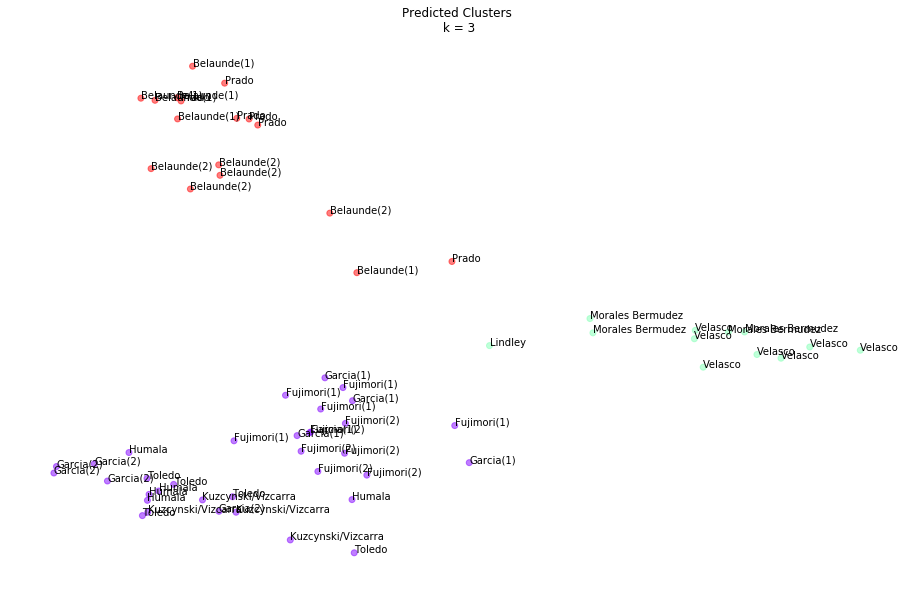

In [13]:
categories = 3
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]

# Plotting
plt.figure(figsize=(16,10))
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

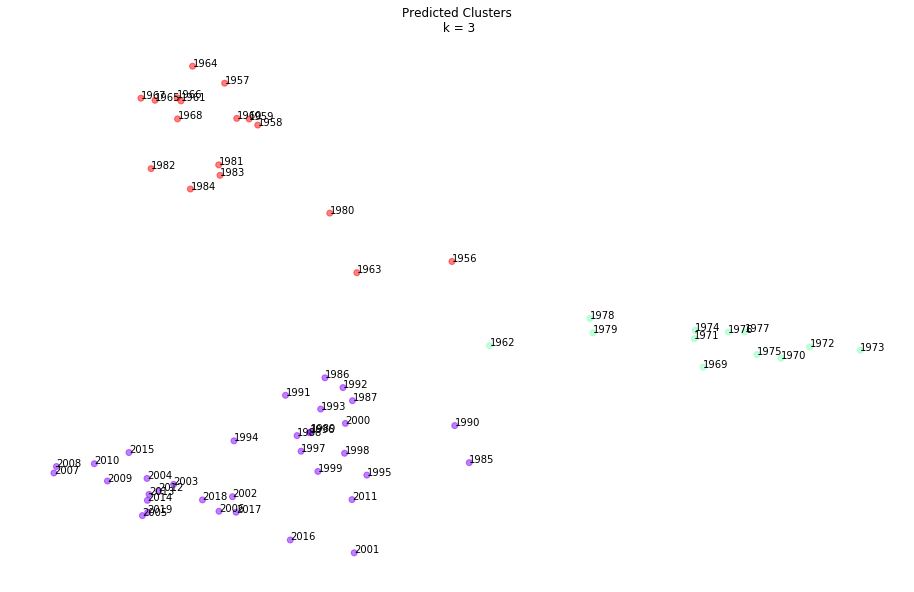

In [14]:
categories = 3
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]

# Plotting
plt.figure(figsize=(16,10))
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
for i, adm in enumerate(df['year']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '-years.png')
plt.show()

/home/lsanmartin/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


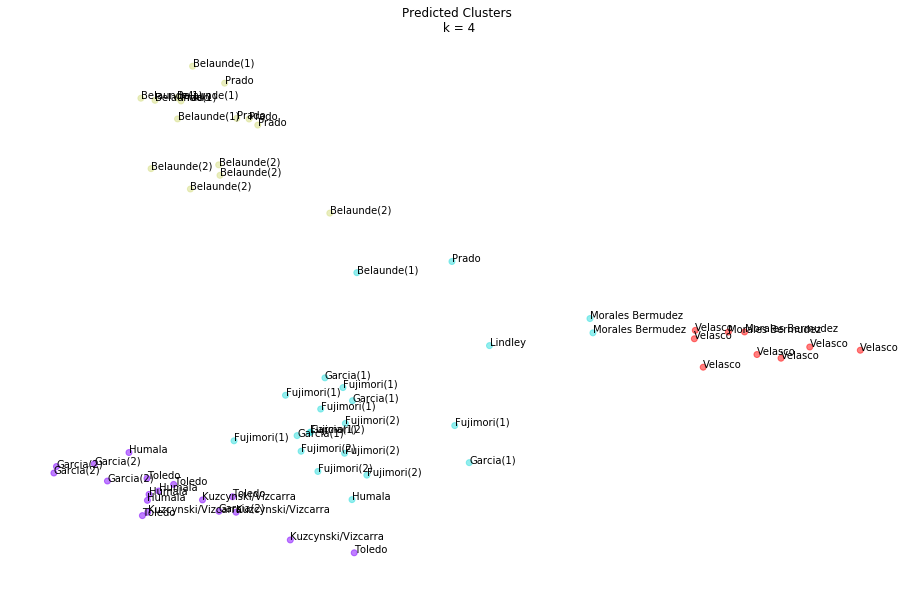

In [15]:
categories = 4
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

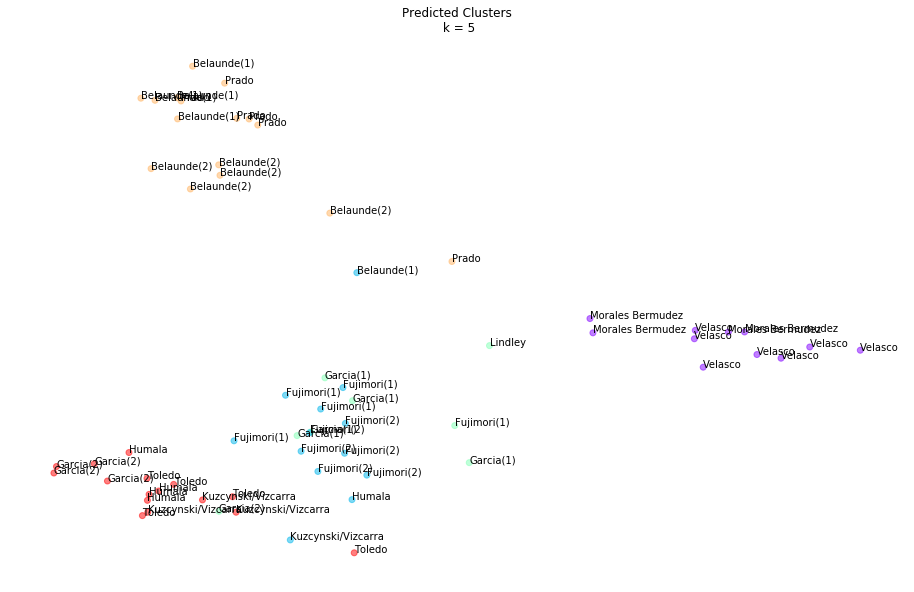

In [16]:
categories = 5
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

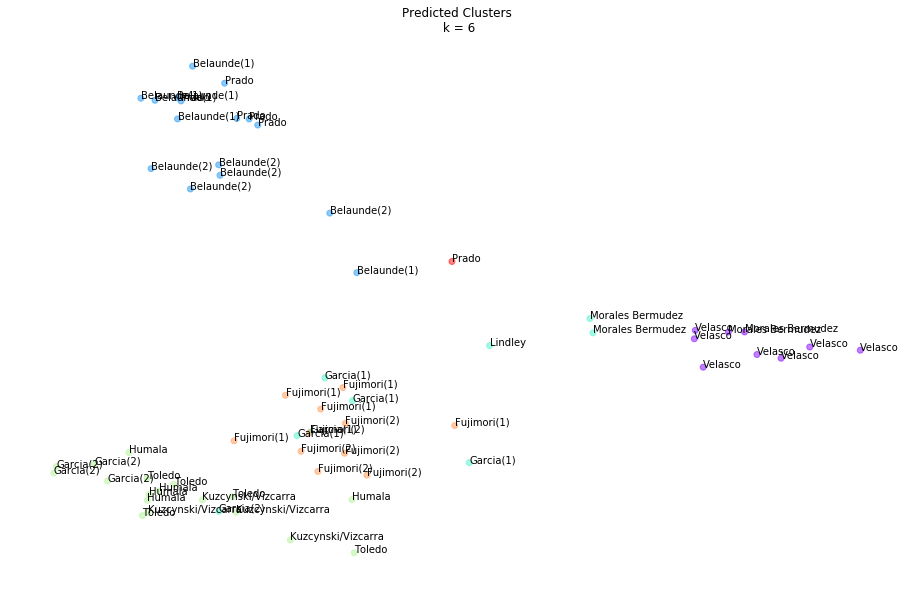

In [17]:
categories = 6
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

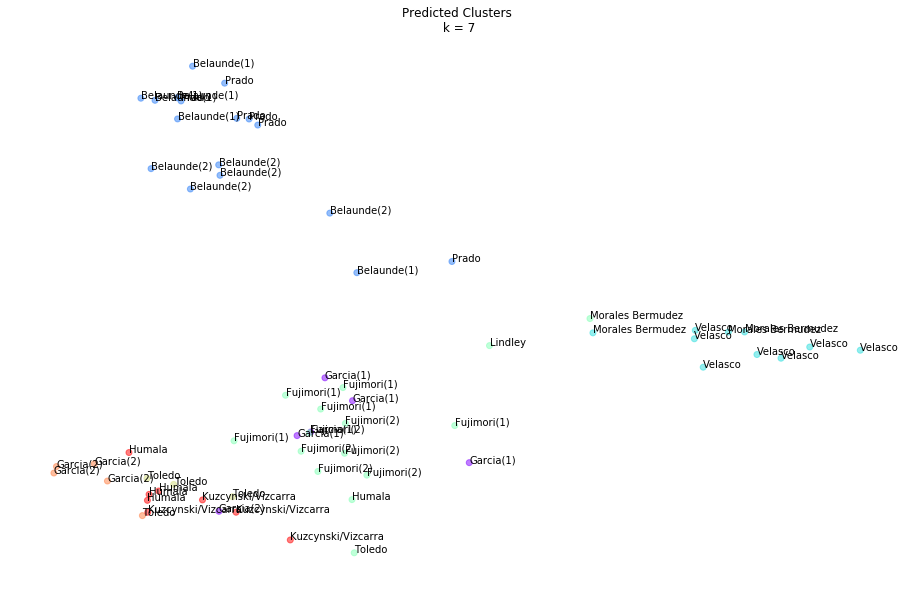

In [18]:
categories = 7
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

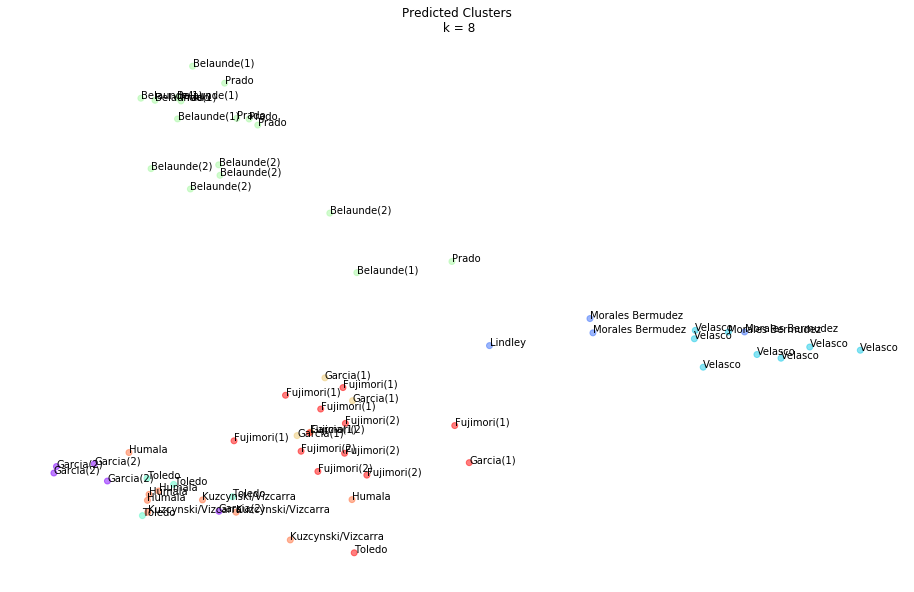

In [19]:
categories = 8
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

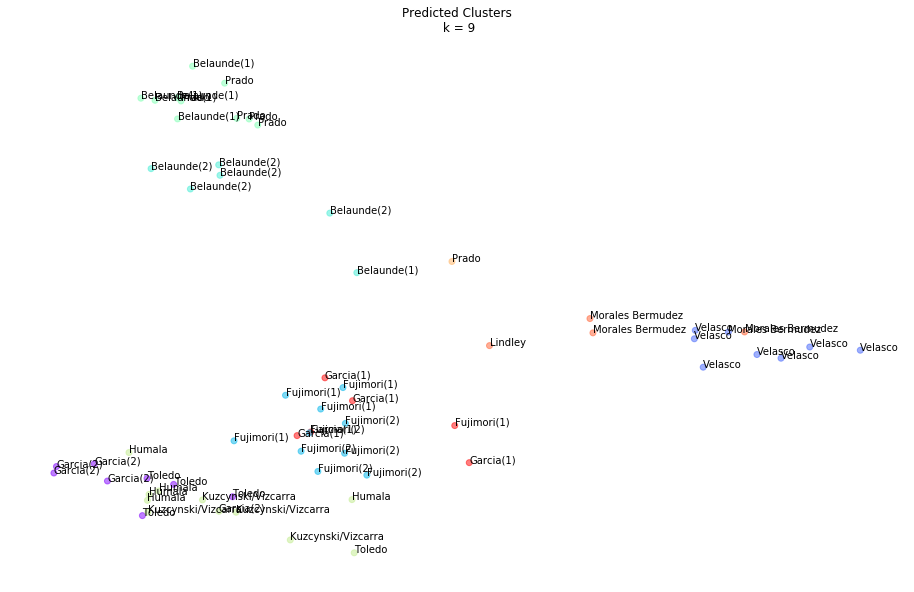

In [20]:
categories = 9
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

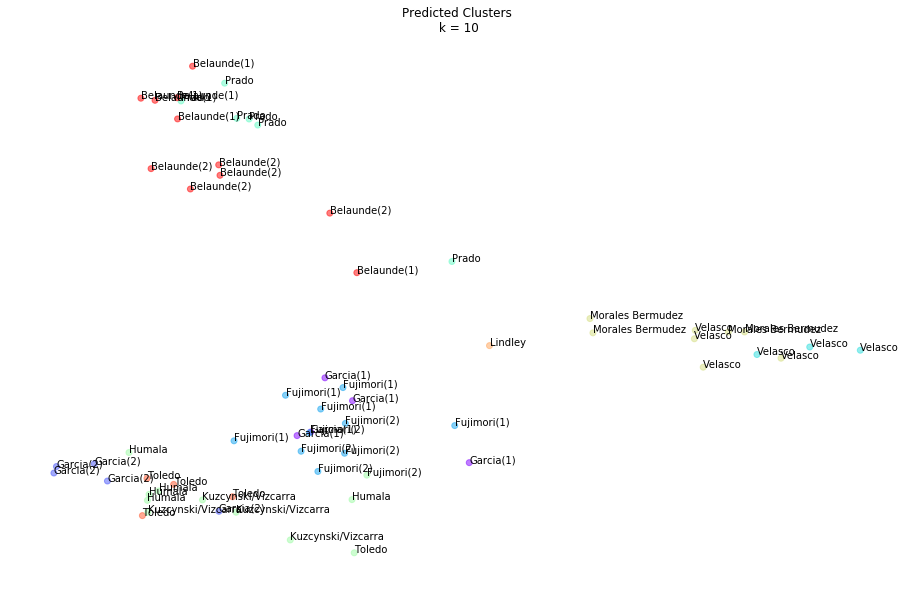

In [21]:
categories = 10
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['administration']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '.png')
plt.show()

## Silhouette Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


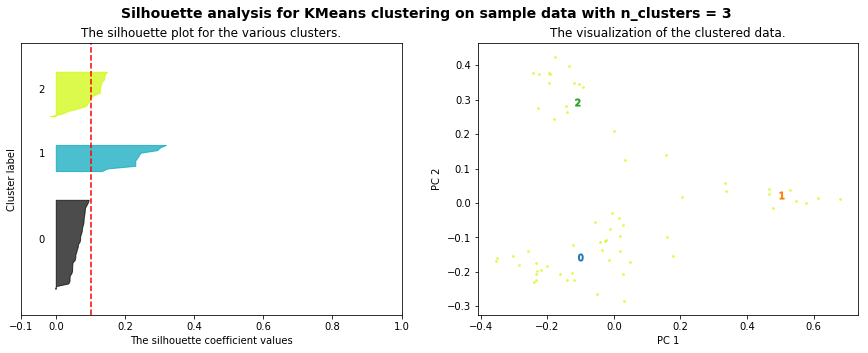

For n_clusters = 3, The average silhouette_score is : 0.103


In [22]:
X = tf_vects.toarray()
util.plot_silhouette(3, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


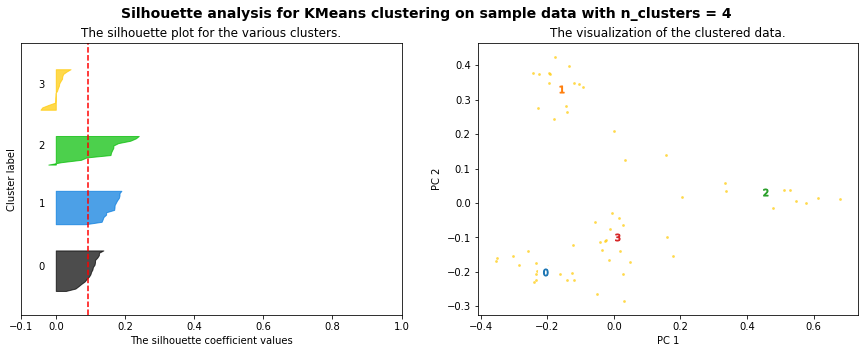

For n_clusters = 4, The average silhouette_score is : 0.094


In [23]:
util.plot_silhouette(4, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


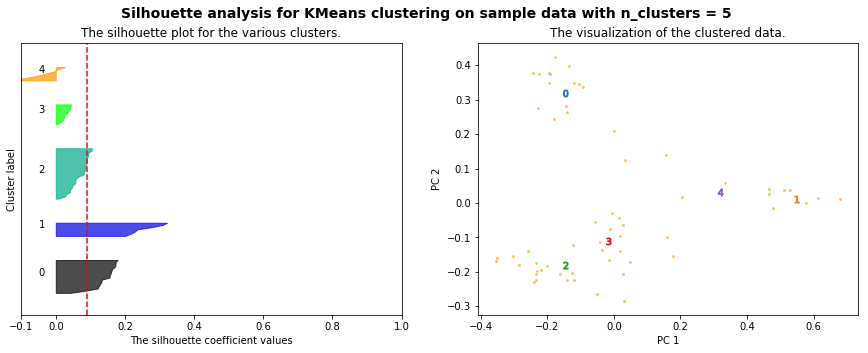

For n_clusters = 5, The average silhouette_score is : 0.089


In [24]:
util.plot_silhouette(5, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


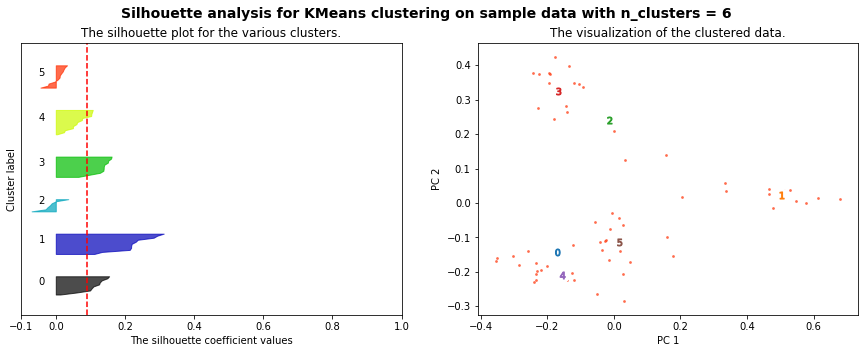

For n_clusters = 6, The average silhouette_score is : 0.091


In [25]:
util.plot_silhouette(6, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


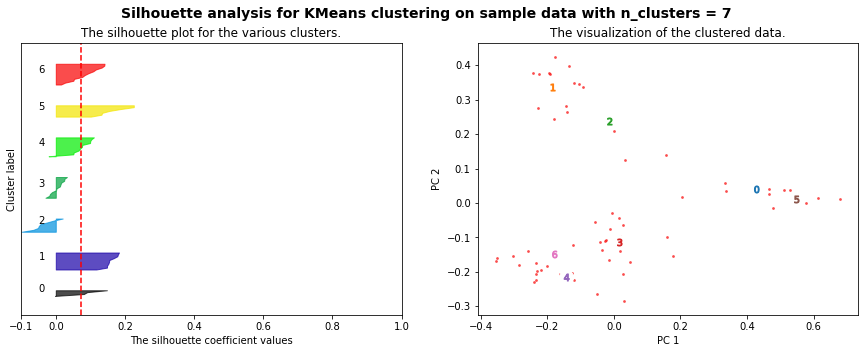

For n_clusters = 7, The average silhouette_score is : 0.072


In [26]:
util.plot_silhouette(7, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


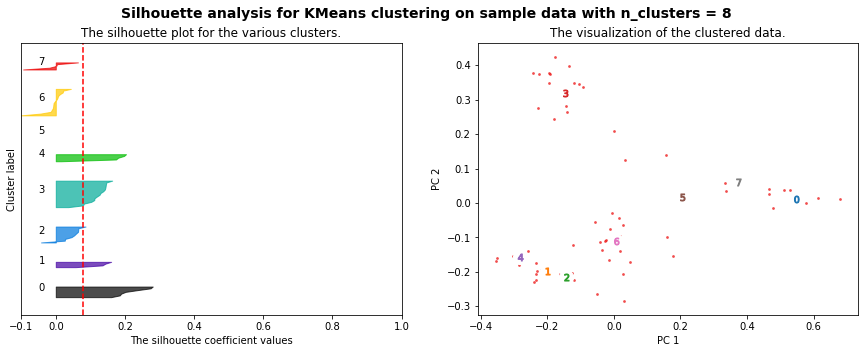

For n_clusters = 8, The average silhouette_score is : 0.078


In [27]:
util.plot_silhouette(8, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


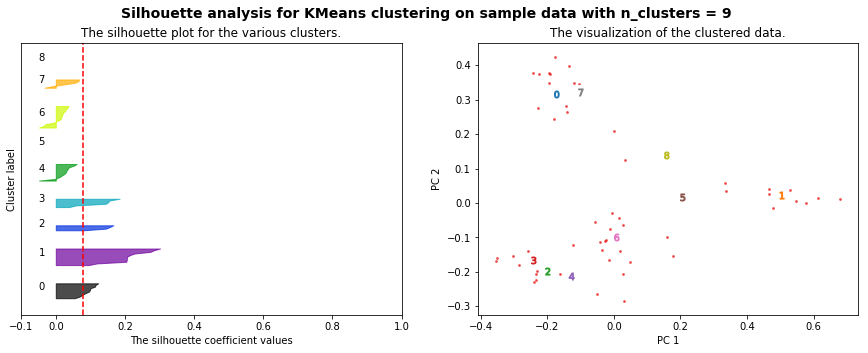

For n_clusters = 9, The average silhouette_score is : 0.079


In [28]:
util.plot_silhouette(9, X, reduced_pca, pca)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


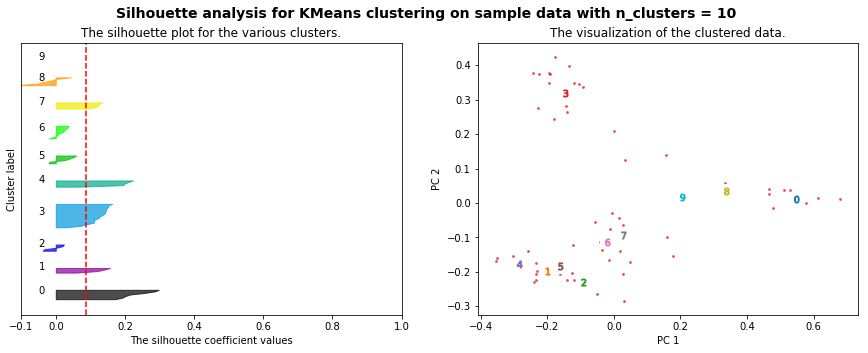

For n_clusters = 10, The average silhouette_score is : 0.088


In [29]:
util.plot_silhouette(10, X, reduced_pca, pca)

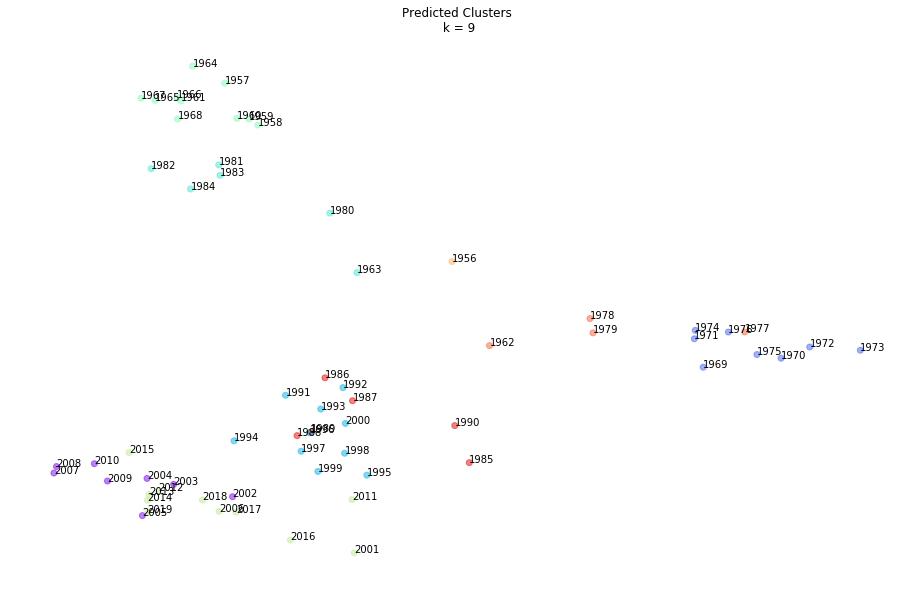

In [30]:
categories = 9
colors = list(plt.cm.rainbow(np.linspace(0,1, categories)))

plt.figure(figsize=(16,10))
colors_p = [colors[l] for l in df['kmeans' + str(categories)]]
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
for i, adm in enumerate(df['year']):
    ax.annotate(adm, (reduced_pca[:, 0][i],reduced_pca[:, 1][i]),size=10)
plt.title('Predicted Clusters\n k = {}'.format(categories))

plt.savefig('../../outputs/clustering/kmeans' + str(categories) + '-years.png')
plt.show()

### Interpretation of results

The Silhouette Analysis results shows that the cluster classification with the highest score is eight clusters, followed closely by the classification of nine clusters (0.122 compared to 0.121). Given that we are analyzing the speeches from 11 different presidents in total, we prefer to choose a number of clusters closer to that number. Thus, we will interpret our results using the classification of nine clusters.

The clustering results reveal patterns in the relative word frequency across speeches. The strongest trend is that speeches from the same administration and president tend to fall in the same cluster. This is specially true for the administrations of Velasco, Morales Bermudez, Prado, Belaunde and Fujimori, though almost every administration follows this pattern. The interpretation of this pattern is clear and not very surprising: presidents tend to use a similar distribution of words in the speeches they give in different years of their administrations.

A less strong but also important trend is that speeches from different administrations but in nearby years also tend to be classified in the same cluster. This is the case, for example, in the speeches from president Prado (1956-1962) and Belaunde's first administration (1964-1968), and in the speeches from the administrations of Toledo (2001-2006), Humala (2011-2016) and Kuczynski-Vizcarra (2016-2019). A possible interpretation of this trend could be the change and evolution of political discourses over time, which could generate a greater distance in speeches from distant years.

Lastly, a final pattern we observe is that almost every inaugural speech after the year 2000 (2001, 2006, 2011 and 2016) falls in clusters different from other speeches from the same administration. This happens with the speeches from 2001, 2006 and 2011, since they are classified inside the same cluster, a cluster that does not contain any other speech from their same administrations.